In [1]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [2]:
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
	models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
	models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
	models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
	models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	return ensemble

In [3]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['cart1'] = DecisionTreeRegressor(max_depth=1)
	models['cart2'] = DecisionTreeRegressor(max_depth=2)
	models['cart3'] = DecisionTreeRegressor(max_depth=3)
	models['cart4'] = DecisionTreeRegressor(max_depth=4)
	models['cart5'] = DecisionTreeRegressor(max_depth=5)
	models['voting'] = get_voting()
	return models

>cart1 -161.519 (11.414)
>cart2 -152.596 (11.271)
>cart3 -142.378 (10.900)
>cart4 -140.086 (12.469)
>cart5 -137.793 (12.138)
>voting -136.384 (11.269)


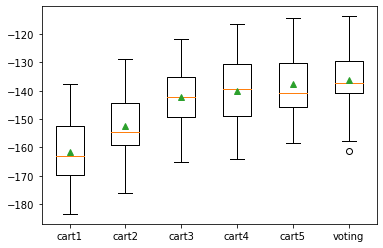

In [4]:
# compare voting ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y
 
# get a voting ensemble of models
def get_voting():
	# define the base models
	models = list()
	models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
	models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
	models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
	models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
	models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	return ensemble
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['cart1'] = DecisionTreeRegressor(max_depth=1)
	models['cart2'] = DecisionTreeRegressor(max_depth=2)
	models['cart3'] = DecisionTreeRegressor(max_depth=3)
	models['cart4'] = DecisionTreeRegressor(max_depth=4)
	models['cart5'] = DecisionTreeRegressor(max_depth=5)
	models['voting'] = get_voting()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [5]:
# make a prediction with a voting ensemble
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
models = list()
models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
# define the voting ensemble
ensemble = VotingRegressor(estimators=models)
# fit the model on all available data
ensemble.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = ensemble.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 141.319
